In [1]:
import helpsk as hlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

%matplotlib inline

# Load Data

In [2]:
# https://www.openml.org/d/537
# save locally in case dataset changes or is removed
data = fetch_openml('houses', version=1)
housing_data = data['data']
housing_data['target'] = data['target']

In [3]:
hlp.pandas.numeric_summary(dataframe=housing_data, return_style=True)

,# of Non-Nulls,# of Nulls,% Nulls,# of Zeros,% Zeros,Mean,St Dev.,Coef of Var,Skewness,Kurtosis,Min,10%,25%,50%,75%,90%,Max
median_income,"20,640",0,0.0%,0,0.0%,3.9,1.9,0.5,1.6,5.0,0.5,1.9,2.6,3.5,4.7,6.2,15.0
housing_median_age,"20,640",0,0.0%,0,0.0%,28.6,12.6,0.4,0.1,-0.8,1.0,13.0,18.0,29.0,37.0,46.0,52.0
total_rooms,"20,640",0,0.0%,0,0.0%,"2,635.8","2,181.6",0.8,4.2,32.6,2.0,941.0,"1,447.8","2,127.0","3,148.0","4,651.5","39,320.0"
total_bedrooms,"20,640",0,0.0%,0,0.0%,537.9,421.2,0.8,3.5,21.9,1.0,198.0,295.0,435.0,647.0,966.0,"6,445.0"
population,"20,640",0,0.0%,0,0.0%,"1,425.5","1,132.5",0.8,4.9,73.5,3.0,510.0,787.0,"1,166.0","1,725.0","2,566.0","35,682.0"
households,"20,640",0,0.0%,0,0.0%,499.5,382.3,0.8,3.4,22.1,1.0,184.0,280.0,409.0,605.0,890.0,"6,082.0"
latitude,"20,640",0,0.0%,0,0.0%,35.6,2.1,0.1,0.5,-1.1,32.5,33.6,33.9,34.3,37.7,38.5,42.0
longitude,"20,640",0,0.0%,0,0.0%,-119.6,2.0,-0.0,-0.3,-1.3,-124.3,-122.3,-121.8,-118.5,-118.0,-117.2,-114.3
target,"20,640",0,0.0%,0,0.0%,"206,855.8","115,395.6",0.6,1.0,0.3,"14,999.0","82,300.0","119,600.0","179,700.0","264,725.0","376,600.0","500,001.0"


# Grid Serach

In [4]:
#housing_data.loc[0:46, ['median_income']] = np.nan
#housing_data.loc[25:75, ['housing_median_age']] = np.nan
y_full = housing_data['target']
X_full = housing_data.drop(columns='target')  # noqa
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)  # noqa
del y_full, X_full
random_forest_model = RandomForestRegressor(random_state=42)
param_grad = [
{
    'max_features': [2, 5],
    'n_estimators': [2, 10]
},
]
scores = {
            'RMSE': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
            'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
        }
grid_search = GridSearchCV(random_forest_model,
                       param_grid=param_grad,
                           cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42),
                       scoring=scores, refit='RMSE')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 5], 'n_estimators': [2, 10]}],
             refit='RMSE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
                      'RMSE': make_scorer(mean_squared_error, greater_is_better=False, squared=False)})

In [5]:
grid_search.best_estimator_

RandomForestRegressor(max_features=5, n_estimators=10, random_state=42)

## Grid Search Results

In [6]:
hlp.sklearn.cv_results_to_dataframe(grid_search, num_folds=5, num_repeats=2, round_by=0)

RMSE Mean,RMSE 95CI.LO,RMSE 95CI.HI,MAE Mean,MAE 95CI.LO,MAE 95CI.HI,max_features,n_estimators
"-52,797","-53,540","-52,054","-35,077","-35,480","-34,674",5,10
"-55,605","-56,219","-54,991","-38,410","-38,793","-38,027",2,10
"-64,434","-65,563","-63,306","-42,781","-43,720","-41,842",5,2
"-68,831","-69,705","-67,956","-46,792","-47,334","-46,250",2,2


# Test Set Results

In [7]:
test_predictions = grid_search.best_estimator_.predict(X_test)

In [8]:
evaluator = hlp.sklearn.RegressionEvaluator(actual_values=y_test, predicted_values=test_predictions)

In [9]:
evaluator.all_metrics_df(return_style=True, round_by=0)

,Scores
Mean Absolute Error (MAE),"34,297"
Root Mean Squared Error (RMSE),"52,241"
RMSE to Standard Deviation of Target,0.456
R Squared,0.792
Total Observations,"4,128"


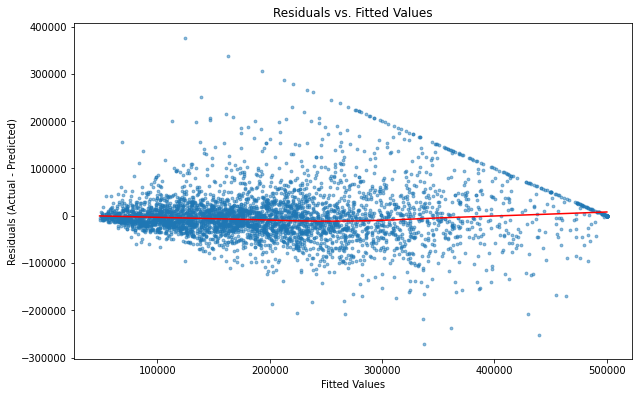

In [10]:
evaluator.plot_residuals_vs_fits()

In [11]:

#cls.housing_data__grid_search = grid_search
#best_model = grid_search.best_estimator_
#predicted_scores = best_model.predict_proba(X_test)[:, 1]
#cls.credit_data__y_test = y_test
#cls.credit_data__y_scores = predicted_scores
